In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import pywt
from scipy.fftpack import fft
from scipy.signal import cwt

In [3]:
DF = pd.read_excel('State11.xlsx', sheet_name ='Tabelle1', header=None)

In [1]:
DF1=pd.read_excel('State12.xlsx', sheet_name ='Tabelle1', header=None)

NameError: name 'pd' is not defined

In [8]:
DF2=pd.read_excel('State2.xlsx', sheet_name ='Tabelle1', header=None)

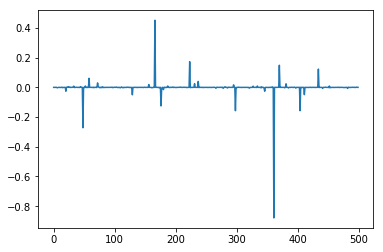

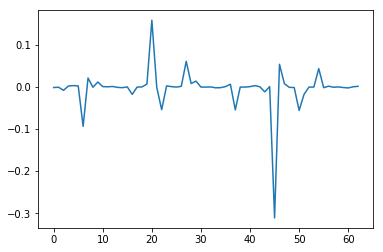

In [10]:
plt.plot(DF[6])
plt.show()
cA11, cD11 = pywt.dwt(DF[6], 'haar')
cA12, cD12 = pywt.dwt(cA11, 'haar')
cA13, cD13 = pywt.dwt(cA12, 'haar')
plt.plot(cA13)
plt.show()

In [9]:
df=pd.DataFrame(DF)
df2=pd.DataFrame(DF2)
df2.shape

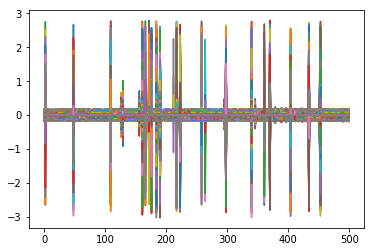

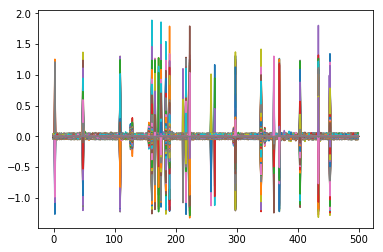

(500, 2048)

In [5]:
cA11, cD11 = pywt.dwt(df, 'haar')
cA12, cD12 = pywt.dwt(cA11, 'haar')
cA13, cD13 = pywt.dwt(cA12, 'haar')
plt.plot(cA13)
plt.show()
plt.plot(cD13)
plt.show()
cD13.shape

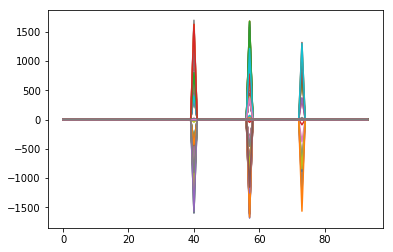

(94, 2048)

In [11]:
cA21, cD21 = pywt.dwt(df2, 'haar')
cA22, cD22 = pywt.dwt(cA21, 'haar')
cA23, cD23 = pywt.dwt(cA22, 'haar')
plt.plot(cD23)
plt.show()
cD23.shape

In [12]:
mfcA1=np.mean(abs(cA13),axis=1)
mfcD1=np.mean(abs(cD13),axis=1)
mfcA2=np.mean(abs(cA23),axis=1)
mfcD2=np.mean(abs(cD23),axis=1)
mfcA1.shape

(500,)

In [13]:
mfcA1=np.max(abs(cA13),axis=1)
mfcD1=np.max(abs(cD13),axis=1)
mfcA2=np.max(abs(cA23),axis=1)
mfcD2=np.max(abs(cD23),axis=1)
mfcD2.shape

(94,)

In [14]:
rmscA1=np.square(cA13)
rmscA1=np.mean(rmscA1,axis=1)
rmscA1=np.sqrt(rmscA1)
rmscD1=np.square(cD13)
rmscD1=np.mean(rmscD1,axis=1)
rmscD1=np.sqrt(rmscD1)
rmscA2=np.square(cA23)
rmscA2=np.mean(rmscA2,axis=1)
rmscA2=np.sqrt(rmscA2)
rmscD2=np.square(cD23)
rmscD2=np.mean(rmscD2,axis=1)
rmscD2=np.sqrt(rmscD2)



In [15]:
print(rmscA1)
print(rmscA2)

[ 0.02509295  0.02555915  0.19386528  0.02469376  0.02552107  0.02288399
  0.03548109  0.0256098   0.02437167  0.02503377  0.02550595  0.00265061
  0.04364706  0.0254735   0.01220325  0.02459051  0.02558086  0.02554156
  0.02505658  0.02481253  0.02727023  0.02485365  0.02503691  0.02555103
  0.02490295  0.02538704  0.02527978  0.02525708  0.02535653  0.02530732
  0.0255846   0.02556904  0.02559627  0.03528995  0.02527379  0.02576606
  0.02544429  0.0254119   0.02522969  0.02595291  0.02512376  0.0256036
  0.02585413  0.02611283  0.02544742  0.02563694  0.02454101  0.02503523
  0.32592226  0.02524784  0.00653247  0.02768129  0.0260199   0.02507573
  0.02585494  0.02592374  0.01114929  0.0257671   0.03412319  0.02532142
  0.02500548  0.02475944  0.03553731  0.0247479   0.04434112  0.02494304
  0.04259748  0.02570405  0.02474033  0.04489994  0.00243959  0.02474567
  0.02534362  0.02555363  0.02597358  0.02595983  0.02579153  0.02565853
  0.00617484  0.02496256  0.02522123  0.02569359  0.

In [149]:
vfcA1=np.var(cA13,axis=1)
vfcD1=np.var(cD13,axis=1)
vfcA2=np.var(cA23,axis=1)
vfcD2=np.var(cD23,axis=1)
afcA1=np.average(cA13,axis=1)
afcD1=np.average(cD13,axis=1)
afcA2=np.average(cA23,axis=1)
afcD2=np.average(cD23,axis=1)
mfcA1=np.max(cA13,axis=1)
mfcD1=np.max(cD13,axis=1)
mfcA2=np.max(cA23,axis=1)
mfcD2=np.max(cD23,axis=1)



In [75]:
d1=pd.DataFrame()
d1['mfcA']=mfcA1
d1['mfcD']=mfcD1
d1['rmscA']=rmscA1
d1['rmscD']=rmscD1
d1['maxcA']=mfcA1
d1['maxcD']=mfcD1
state1='state1'
d1['state']=state1
d2=pd.DataFrame()
d2['mfcA']=mfcA2 
d2['mfcD']=mfcD2
d2['rmscA']=rmscA2
d2['rmscD']=rmscD2
d2['maxcA']=mfcA2
d2['maxcD']=mfcD2
state2='state2'
d2['state']= state2
#df=d1.append(d2)

In [ ]:
df=pd.concat([d1,d2],axis=0,ignore_index=True)
print(df)

NameError: name 'pd' is not defined

In [77]:
#df.to_excel("WaveletFeatureData.xlsx")
writer = pd.ExcelWriter('output.xlsx')
df.to_excel(writer)
writer.save()
#df=df.iloc[np.random.permutation(len(df))]

In [10]:
df=pd.read_excel("output.xlsx")

In [11]:
X=df[['mfcA','mfcD','rmscA','rmscD','maxcA','maxcD']]
X.shape
y= df['state']
print(y.shape)

(594,)


In [12]:
#Import required libraries 
import keras #library for neural network
import pandas as pd #loading data in table form  
#import seaborn as sns #visualisation 
#import matplotlib.pyplot as plt #visualisation
import numpy as np # linear algebra
from sklearn.preprocessing import normalize #machine learning algorithm library
from sklearn import preprocessing

In [13]:
F= df.iloc[:490]
L=df.iloc[501:]

In [14]:
new_df=F.append(L)
new_df=new_df.reset_index(drop=True)
print(new_df)

            mfcA         mfcD       rmscA      rmscD        maxcA  \
0       0.179959     0.046315    0.025093   0.006781     0.179959   
1       0.182434     0.049144    0.025559   0.006923     0.182434   
2       2.756656     1.265368    0.193865   0.085700     2.756656   
3       0.167584     0.047730    0.024694   0.006664     0.167584   
4       0.178898     0.049144    0.025521   0.006875     0.178898   
5       0.185262     0.045962    0.022884   0.006143     0.185262   
6       0.178898     0.051619    0.035481   0.009571     0.178898   
7       0.181726     0.048790    0.025610   0.006862     0.181726   
8       0.163695     0.048083    0.024372   0.006592     0.163695   
9       0.173241     0.048083    0.025034   0.006665     0.173241   
10      0.169352     0.050558    0.025506   0.006873     0.169352   
11      0.026870     0.010607    0.002651   0.001069     0.026870   
12      0.175362     0.047023    0.043647   0.011661     0.175362   
13      0.166170     0.050558    0

            mfcA         mfcD       rmscA      rmscD        maxcA  \
0       0.179959     0.046315    0.025093   0.006781     0.179959   
1       0.182434     0.049144    0.025559   0.006923     0.182434   
2       2.756656     1.265368    0.193865   0.085700     2.756656   
3       0.167584     0.047730    0.024694   0.006664     0.167584   
4       0.178898     0.049144    0.025521   0.006875     0.178898   
5       0.185262     0.045962    0.022884   0.006143     0.185262   
6       0.178898     0.051619    0.035481   0.009571     0.178898   
7       0.181726     0.048790    0.025610   0.006862     0.181726   
8       0.163695     0.048083    0.024372   0.006592     0.163695   
9       0.173241     0.048083    0.025034   0.006665     0.173241   
10      0.169352     0.050558    0.025506   0.006873     0.169352   
11      0.026870     0.010607    0.002651   0.001069     0.026870   
12      0.175362     0.047023    0.043647   0.011661     0.175362   
13      0.166170     0.050558    0

In [15]:
new_df=df
new_df.shape

(594, 7)

(594, 7)

In [16]:
s11=0
s22=1

In [17]:
new_df["state"]=new_df["state"].map({'state1':s11,'state2':s22})

In [18]:
new_df=new_df.iloc[np.random.permutation(len(new_df))]

In [19]:
new_df=new_df.reset_index(drop=True)
print(new_df)

         mfcA      mfcD     rmscA     rmscD     maxcA     maxcD  state
0    0.176070  0.046315  0.024943  0.006726  0.176070  0.046315      0
1    0.178898  0.046315  0.025222  0.006797  0.178898  0.046315      0
2    0.165817  0.048437  0.025100  0.006762  0.165817  0.048437      0
3    2.871914  1.792869  0.393029  0.189623  2.871914  1.792869      0
4    0.159099  0.050205  0.024666  0.006644  0.159099  0.050205      0
5    0.181019  0.045608  0.025412  0.006825  0.181019  0.045608      0
6    0.172181  0.047376  0.044366  0.011913  0.172181  0.047376      0
7    0.066822  0.027577  0.019967  0.003295  0.066822  0.027577      1
8    0.181373  0.052326  0.026454  0.007157  0.181373  0.052326      0
9    0.178544  0.046669  0.024962  0.006755  0.178544  0.046669      0
10   0.172888  0.051265  0.025931  0.007022  0.172888  0.051265      0
11   0.176070  0.048437  0.025321  0.006818  0.176070  0.048437      0
12   0.172534  0.046315  0.025015  0.006735  0.172534  0.046315      0
13   0

         mfcA      mfcD     rmscA     rmscD     maxcA     maxcD  state
0    0.166524  0.047023  0.024583  0.006628  0.166524  0.047023      0
1    0.168645  0.049497  0.025403  0.006874  0.168645  0.049497      0
2    0.167938  0.049497  0.025458  0.006843  0.167938  0.049497      0
3    0.125511  0.072125  0.009063  0.003876  0.125511  0.072125      0
4    0.161927  0.049144  0.024746  0.006686  0.161927  0.049144      0
5    0.181726  0.045962  0.025354  0.006790  0.181726  0.045962      0
6    0.182080  0.044194  0.025352  0.006809  0.182080  0.044194      0
7    0.183848  0.046669  0.027882  0.007482  0.183848  0.046669      0
8    0.161220  0.050205  0.025103  0.006787  0.161220  0.050205      0
9    0.059751  0.036062  0.011897  0.003345  0.059751  0.036062      1
10   0.176070  0.048790  0.024982  0.006694  0.176070  0.048790      0
11   0.167938  0.051619  0.025276  0.006819  0.167938  0.051619      0
12   0.176423  0.044548  0.024715  0.006629  0.176423  0.044548      0
13   0

In [20]:
newX=new_df[['mfcA','mfcD','rmscA','rmscD','maxcA','maxcD']]
newX

,mfcA,mfcD,rmscA,rmscD,maxcA,maxcD
0,0.166524,0.047023,0.024583,0.006628,0.166524,0.047023
1,0.168645,0.049497,0.025403,0.006874,0.168645,0.049497
2,0.167938,0.049497,0.025458,0.006843,0.167938,0.049497
3,0.125511,0.072125,0.009063,0.003876,0.125511,0.072125
4,0.161927,0.049144,0.024746,0.006686,0.161927,0.049144
5,0.181726,0.045962,0.025354,0.006790,0.181726,0.045962
6,0.182080,0.044194,0.025352,0.006809,0.182080,0.044194
7,0.183848,0.046669,0.027882,0.007482,0.183848,0.046669
8,0.161220,0.050205,0.025103,0.006787,0.161220,0.050205
9,0.059751,0.036062,0.011897,0.003345,0.059751,0.036062


In [22]:
newy=new_df[['state']]

In [21]:
X_normalized=newX

In [23]:
total_length=len(new_df)
train_length=int(0.8*total_length)
test_length=int(0.2*total_length)

X_train=X_normalized[:train_length]
X_test=X_normalized[train_length:]
y_train=newy[:train_length]
y_test=newy[train_length:]

In [26]:
from keras.models import Sequential 
from keras.layers import Dense,Activation,Dropout 
from keras.layers.normalization import BatchNormalization 
from keras.utils import np_utils

In [27]:
print("Length of train set x:",X_train.shape[0],"y:",y_train.shape[0])
print("Length of test set x:",X_test.shape[0],"y:",y_test.shape[0])

Length of train set x: 475 y: 475
Length of test set x: 119 y: 119


In [28]:
y_train=np_utils.to_categorical(y_train,num_classes=2)
y_test=np_utils.to_categorical(y_test,num_classes=2)

In [29]:
y_test

array([[ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,

In [30]:
model=Sequential()
model.add(Dense(1000,input_dim=6,activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [31]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1000)              7000      
_________________________________________________________________
dense_6 (Dense)              (None, 500)               500500    
_________________________________________________________________
dense_7 (Dense)              (None, 300)               150300    
_________________________________________________________________
dropout_2 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 602       
Total params: 658,402
Trainable params: 658,402
Non-trainable params: 0
_________________________________________________________________


In [32]:

model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=20,epochs=20,verbose=1)


Train on 475 samples, validate on 119 samples
Epoch 1/20


 20/475 [>.............................] - ETA: 23s - loss: 0.6950 - acc: 0.3500

 60/475 [==>...........................] - ETA: 7s - loss: 0.6632 - acc: 0.6500 

120/475 [======>.......................] - ETA: 3s - loss: 0.6058 - acc: 0.7583

160/475 [=========>....................] - ETA: 2s - loss: 0.5734 - acc: 0.7688

220/475 [============>.................] - ETA: 1s - loss: 0.5132 - acc: 0.7909

280/475 [================>.............] - ETA: 0s - loss: 0.5319 - acc: 0.8000

340/475 [====================>.........] - ETA: 0s - loss: 0.4622 - acc: 0.8265

400/475 [========================>.....] - ETA: 0s - loss: 0.4582 - acc: 0.8250

460/475 [============================>.] - ETA: 0s - loss: 0.5080 - acc: 0.8239

475/475 [==============================] - 2s 3ms/step - loss: 0.4994 - acc: 0.8253 - val_loss: 0.2832 - val_acc: 0.8487


Epoch 2/20


 20/475 [>.............................] - ETA: 0s - loss: 0.3373 - acc: 0.8000

 60/475 [==>...........................] - ETA: 0s - loss: 0.2933 - acc: 0.8333

100/475 [=====>........................] - ETA: 0s - loss: 0.3196 - acc: 0.8100

140/475 [=======>......................] - ETA: 0s - loss: 0.4050 - acc: 0.8357

180/475 [==========>...................] - ETA: 0s - loss: 0.4584 - acc: 0.8389

220/475 [============>.................] - ETA: 0s - loss: 0.4337 - acc: 0.8182

260/475 [===============>..............] - ETA: 0s - loss: 0.3951 - acc: 0.8308

300/475 [=================>............] - ETA: 0s - loss: 0.3792 - acc: 0.8233

340/475 [====================>.........] - ETA: 0s - loss: 0.3646 - acc: 0.8147

380/475 [=======================>......] - ETA: 0s - loss: 0.3310 - acc: 0.8342

420/475 [=========================>....] - ETA: 0s - loss: 0.3176 - acc: 0.8357

460/475 [============================>.] - ETA: 0s - loss: 0.3312 - acc: 0.8457

475/475 [==============================] - 1s 2ms/step - loss: 0.3245 - acc: 0.8484 - val_loss: 0.1486 - val_acc: 0.9328


Epoch 3/20


 20/475 [>.............................] - ETA: 1s - loss: 0.1790 - acc: 0.9000

 60/475 [==>...........................] - ETA: 0s - loss: 0.1335 - acc: 0.9500

100/475 [=====>........................] - ETA: 0s - loss: 0.1377 - acc: 0.9400

140/475 [=======>......................] - ETA: 0s - loss: 0.1587 - acc: 0.9429

180/475 [==========>...................] - ETA: 0s - loss: 0.1482 - acc: 0.9500

240/475 [==============>...............] - ETA: 0s - loss: 0.2109 - acc: 0.9500

300/475 [=================>............] - ETA: 0s - loss: 0.2463 - acc: 0.9533

360/475 [=====================>........] - ETA: 0s - loss: 0.2160 - acc: 0.9611

400/475 [========================>.....] - ETA: 0s - loss: 0.2629 - acc: 0.9600

460/475 [============================>.] - ETA: 0s - loss: 0.2373 - acc: 0.9652

475/475 [==============================] - 1s 1ms/step - loss: 0.2330 - acc: 0.9642 - val_loss: 0.1283 - val_acc: 0.9412


Epoch 4/20
 20/475 [>.............................] - ETA: 0s - loss: 0.0876 - acc: 1.0000

 60/475 [==>...........................] - ETA: 0s - loss: 0.1121 - acc: 0.9667

100/475 [=====>........................] - ETA: 0s - loss: 0.2692 - acc: 0.9600

140/475 [=======>......................] - ETA: 0s - loss: 0.2195 - acc: 0.9571

200/475 [===========>..................] - ETA: 0s - loss: 0.2459 - acc: 0.9650

260/475 [===============>..............] - ETA: 0s - loss: 0.2367 - acc: 0.9615

320/475 [===================>..........] - ETA: 0s - loss: 0.2056 - acc: 0.9656

380/475 [=======================>......] - ETA: 0s - loss: 0.1874 - acc: 0.9658

440/475 [==========================>...] - ETA: 0s - loss: 0.2089 - acc: 0.9659

475/475 [==============================] - 1s 1ms/step - loss: 0.2032 - acc: 0.9642 - val_loss: 0.1370 - val_acc: 0.9412


Epoch 5/20


 20/475 [>.............................] - ETA: 0s - loss: 0.0213 - acc: 1.0000

 60/475 [==>...........................] - ETA: 0s - loss: 0.2948 - acc: 0.9833

100/475 [=====>........................] - ETA: 0s - loss: 0.2074 - acc: 0.9800

140/475 [=======>......................] - ETA: 0s - loss: 0.2976 - acc: 0.9643

180/475 [==========>...................] - ETA: 0s - loss: 0.2630 - acc: 0.9667

220/475 [============>.................] - ETA: 0s - loss: 0.2184 - acc: 0.9727

260/475 [===============>..............] - ETA: 0s - loss: 0.2194 - acc: 0.9577

300/475 [=================>............] - ETA: 0s - loss: 0.1916 - acc: 0.9633

340/475 [====================>.........] - ETA: 0s - loss: 0.1872 - acc: 0.9618

400/475 [========================>.....] - ETA: 0s - loss: 0.2246 - acc: 0.9625

460/475 [============================>.] - ETA: 0s - loss: 0.2046 - acc: 0.9630

475/475 [==============================] - 1s 1ms/step - loss: 0.1987 - acc: 0.9642 - val_loss: 0.1341 - val_acc: 0.9412


Epoch 6/20


 20/475 [>.............................] - ETA: 0s - loss: 0.0536 - acc: 1.0000

 60/475 [==>...........................] - ETA: 0s - loss: 0.3602 - acc: 0.9500

120/475 [======>.......................] - ETA: 0s - loss: 0.2109 - acc: 0.9667

180/475 [==========>...................] - ETA: 0s - loss: 0.1820 - acc: 0.9667

240/475 [==============>...............] - ETA: 0s - loss: 0.1642 - acc: 0.9667

300/475 [=================>............] - ETA: 0s - loss: 0.1967 - acc: 0.9667

360/475 [=====================>........] - ETA: 0s - loss: 0.2182 - acc: 0.9667

420/475 [=========================>....] - ETA: 0s - loss: 0.1990 - acc: 0.9667

460/475 [============================>.] - ETA: 0s - loss: 0.1875 - acc: 0.9674

475/475 [==============================] - 1s 1ms/step - loss: 0.1822 - acc: 0.9684 - val_loss: 0.1236 - val_acc: 0.9496


Epoch 7/20


 20/475 [>.............................] - ETA: 0s - loss: 0.0990 - acc: 0.9500

 60/475 [==>...........................] - ETA: 0s - loss: 0.2509 - acc: 0.9667

120/475 [======>.......................] - ETA: 0s - loss: 0.2699 - acc: 0.9750

180/475 [==========>...................] - ETA: 0s - loss: 0.2036 - acc: 0.9778

240/475 [==============>...............] - ETA: 0s - loss: 0.2397 - acc: 0.9708

300/475 [=================>............] - ETA: 0s - loss: 0.2120 - acc: 0.9700

360/475 [=====================>........] - ETA: 0s - loss: 0.1914 - acc: 0.9694

420/475 [=========================>....] - ETA: 0s - loss: 0.2110 - acc: 0.9690

460/475 [============================>.] - ETA: 0s - loss: 0.1990 - acc: 0.9696

475/475 [==============================] - 1s 1ms/step - loss: 0.1968 - acc: 0.9684 - val_loss: 0.1239 - val_acc: 0.9412


Epoch 8/20
 20/475 [>.............................] - ETA: 0s - loss: 0.8200 - acc: 0.9500

 60/475 [==>...........................] - ETA: 0s - loss: 0.3997 - acc: 0.9500

100/475 [=====>........................] - ETA: 0s - loss: 0.4238 - acc: 0.9500

160/475 [=========>....................] - ETA: 0s - loss: 0.3065 - acc: 0.9500

220/475 [============>.................] - ETA: 0s - loss: 0.2389 - acc: 0.9591

280/475 [================>.............] - ETA: 0s - loss: 0.1949 - acc: 0.9679

340/475 [====================>.........] - ETA: 0s - loss: 0.1767 - acc: 0.9676



400/475 [========================>.....] - ETA: 0s - loss: 0.1597 - acc: 0.9700

440/475 [==========================>...] - ETA: 0s - loss: 0.1506 - acc: 0.9705

475/475 [==============================] - 1s 1ms/step - loss: 0.1778 - acc: 0.9684 - val_loss: 0.1236 - val_acc: 0.9496


Epoch 9/20


 20/475 [>.............................] - ETA: 0s - loss: 0.3163 - acc: 0.9000

 60/475 [==>...........................] - ETA: 0s - loss: 0.1448 - acc: 0.9500

100/475 [=====>........................] - ETA: 0s - loss: 0.0904 - acc: 0.9700

160/475 [=========>....................] - ETA: 0s - loss: 0.0762 - acc: 0.9750

220/475 [============>.................] - ETA: 0s - loss: 0.1491 - acc: 0.9682

280/475 [================>.............] - ETA: 0s - loss: 0.1914 - acc: 0.9643

340/475 [====================>.........] - ETA: 0s - loss: 0.1636 - acc: 0.9706

400/475 [========================>.....] - ETA: 0s - loss: 0.1881 - acc: 0.9675

460/475 [============================>.] - ETA: 0s - loss: 0.1782 - acc: 0.9674

475/475 [==============================] - 1s 1ms/step - loss: 0.1762 - acc: 0.9663 - val_loss: 0.1119 - val_acc: 0.9496


Epoch 10/20


 20/475 [>.............................] - ETA: 0s - loss: 0.9105 - acc: 0.9000

 60/475 [==>...........................] - ETA: 0s - loss: 0.3138 - acc: 0.9667

120/475 [======>.......................] - ETA: 0s - loss: 0.1778 - acc: 0.9750

180/475 [==========>...................] - ETA: 0s - loss: 0.1479 - acc: 0.9722

220/475 [============>.................] - ETA: 0s - loss: 0.1258 - acc: 0.9773

260/475 [===============>..............] - ETA: 0s - loss: 0.1969 - acc: 0.9654

300/475 [=================>............] - ETA: 0s - loss: 0.2336 - acc: 0.9633

340/475 [====================>.........] - ETA: 0s - loss: 0.2112 - acc: 0.9647

400/475 [========================>.....] - ETA: 0s - loss: 0.2047 - acc: 0.9675

460/475 [============================>.] - ETA: 0s - loss: 0.1847 - acc: 0.9696

475/475 [==============================] - 1s 1ms/step - loss: 0.1841 - acc: 0.9663 - val_loss: 0.0958 - val_acc: 0.9496


Epoch 11/20


 20/475 [>.............................] - ETA: 0s - loss: 0.0160 - acc: 1.0000

 60/475 [==>...........................] - ETA: 0s - loss: 0.0493 - acc: 0.9667

120/475 [======>.......................] - ETA: 0s - loss: 0.0469 - acc: 0.9750

180/475 [==========>...................] - ETA: 0s - loss: 0.0373 - acc: 0.9833

240/475 [==============>...............] - ETA: 0s - loss: 0.1036 - acc: 0.9792

280/475 [================>.............] - ETA: 0s - loss: 0.1579 - acc: 0.9714

320/475 [===================>..........] - ETA: 0s - loss: 0.1982 - acc: 0.9656

380/475 [=======================>......] - ETA: 0s - loss: 0.1773 - acc: 0.9684

440/475 [==========================>...] - ETA: 0s - loss: 0.1634 - acc: 0.9682

475/475 [==============================] - 1s 1ms/step - loss: 0.1681 - acc: 0.9684 - val_loss: 0.0852 - val_acc: 0.9496


Epoch 12/20


 20/475 [>.............................] - ETA: 0s - loss: 0.0534 - acc: 0.9500

 40/475 [=>............................] - ETA: 0s - loss: 0.0374 - acc: 0.9750

 80/475 [====>.........................] - ETA: 0s - loss: 0.0952 - acc: 0.9625

120/475 [======>.......................] - ETA: 0s - loss: 0.2346 - acc: 0.9500

180/475 [==========>...................] - ETA: 0s - loss: 0.1620 - acc: 0.9667

240/475 [==============>...............] - ETA: 0s - loss: 0.2090 - acc: 0.9625

300/475 [=================>............] - ETA: 0s - loss: 0.2400 - acc: 0.9567

360/475 [=====================>........] - ETA: 0s - loss: 0.2080 - acc: 0.9611

420/475 [=========================>....] - ETA: 0s - loss: 0.1819 - acc: 0.9643

475/475 [==============================] - 1s 1ms/step - loss: 0.1624 - acc: 0.9684 - val_loss: 0.0796 - val_acc: 0.9916


Epoch 13/20
 20/475 [>.............................] - ETA: 0s - loss: 0.0278 - acc: 1.0000

 60/475 [==>...........................] - ETA: 0s - loss: 0.0416 - acc: 1.0000

120/475 [======>.......................] - ETA: 0s - loss: 0.1714 - acc: 0.9833

160/475 [=========>....................] - ETA: 0s - loss: 0.1379 - acc: 0.9812

220/475 [============>.................] - ETA: 0s - loss: 0.1148 - acc: 0.9773

260/475 [===============>..............] - ETA: 0s - loss: 0.1603 - acc: 0.9769

320/475 [===================>..........] - ETA: 0s - loss: 0.1880 - acc: 0.9750

380/475 [=======================>......] - ETA: 0s - loss: 0.1640 - acc: 0.9763

440/475 [==========================>...] - ETA: 0s - loss: 0.1705 - acc: 0.9727

475/475 [==============================] - 1s 1ms/step - loss: 0.1603 - acc: 0.9747 - val_loss: 0.0706 - val_acc: 0.9580


Epoch 14/20


 20/475 [>.............................] - ETA: 0s - loss: 0.0794 - acc: 0.9500

 60/475 [==>...........................] - ETA: 0s - loss: 0.0441 - acc: 0.9833

100/475 [=====>........................] - ETA: 0s - loss: 0.0345 - acc: 0.9900

160/475 [=========>....................] - ETA: 0s - loss: 0.0488 - acc: 0.9875

220/475 [============>.................] - ETA: 0s - loss: 0.1416 - acc: 0.9773

280/475 [================>.............] - ETA: 0s - loss: 0.1152 - acc: 0.9821

340/475 [====================>.........] - ETA: 0s - loss: 0.1027 - acc: 0.9853

400/475 [========================>.....] - ETA: 0s - loss: 0.0920 - acc: 0.9850

460/475 [============================>.] - ETA: 0s - loss: 0.1172 - acc: 0.9848

475/475 [==============================] - 1s 1ms/step - loss: 0.1537 - acc: 0.9811 - val_loss: 0.0740 - val_acc: 0.9580


Epoch 15/20


 20/475 [>.............................] - ETA: 0s - loss: 0.0114 - acc: 1.0000

 60/475 [==>...........................] - ETA: 0s - loss: 0.0647 - acc: 0.9667

100/475 [=====>........................] - ETA: 0s - loss: 0.0505 - acc: 0.9800

140/475 [=======>......................] - ETA: 0s - loss: 0.0691 - acc: 0.9786

200/475 [===========>..................] - ETA: 0s - loss: 0.0649 - acc: 0.9800

260/475 [===============>..............] - ETA: 0s - loss: 0.0595 - acc: 0.9846

320/475 [===================>..........] - ETA: 0s - loss: 0.1368 - acc: 0.9812

380/475 [=======================>......] - ETA: 0s - loss: 0.1239 - acc: 0.9789

440/475 [==========================>...] - ETA: 0s - loss: 0.1451 - acc: 0.9795

475/475 [==============================] - 1s 1ms/step - loss: 0.1736 - acc: 0.9768 - val_loss: 0.0798 - val_acc: 0.9580


Epoch 16/20
 20/475 [>.............................] - ETA: 0s - loss: 0.0023 - acc: 1.0000

 60/475 [==>...........................] - ETA: 0s - loss: 0.0049 - acc: 1.0000

120/475 [======>.......................] - ETA: 0s - loss: 0.1541 - acc: 0.9750

180/475 [==========>...................] - ETA: 0s - loss: 0.1595 - acc: 0.9667

240/475 [==============>...............] - ETA: 0s - loss: 0.2607 - acc: 0.9667

300/475 [=================>............] - ETA: 0s - loss: 0.2110 - acc: 0.9733

360/475 [=====================>........] - ETA: 0s - loss: 0.1867 - acc: 0.9750

420/475 [=========================>....] - ETA: 0s - loss: 0.1676 - acc: 0.9762

475/475 [==============================] - 1s 1ms/step - loss: 0.1487 - acc: 0.9789 - val_loss: 0.0444 - val_acc: 0.9916


Epoch 17/20
 20/475 [>.............................] - ETA: 0s - loss: 0.0059 - acc: 1.0000

 60/475 [==>...........................] - ETA: 0s - loss: 0.2795 - acc: 0.9833

120/475 [======>.......................] - ETA: 0s - loss: 0.1511 - acc: 0.9917

180/475 [==========>...................] - ETA: 0s - loss: 0.1147 - acc: 0.9889

240/475 [==============>...............] - ETA: 0s - loss: 0.0914 - acc: 0.9917

280/475 [================>.............] - ETA: 0s - loss: 0.0806 - acc: 0.9929

320/475 [===================>..........] - ETA: 0s - loss: 0.1471 - acc: 0.9844

360/475 [=====================>........] - ETA: 0s - loss: 0.1759 - acc: 0.9833

420/475 [=========================>....] - ETA: 0s - loss: 0.1524 - acc: 0.9857

460/475 [============================>.] - ETA: 0s - loss: 0.1412 - acc: 0.9870

475/475 [==============================] - 1s 1ms/step - loss: 0.1370 - acc: 0.9874 - val_loss: 0.0708 - val_acc: 0.9916


Epoch 18/20


 20/475 [>.............................] - ETA: 1s - loss: 0.0099 - acc: 1.0000

 60/475 [==>...........................] - ETA: 0s - loss: 0.0420 - acc: 0.9833

120/475 [======>.......................] - ETA: 0s - loss: 0.0724 - acc: 0.9750

160/475 [=========>....................] - ETA: 0s - loss: 0.1655 - acc: 0.9687

200/475 [===========>..................] - ETA: 0s - loss: 0.1349 - acc: 0.9750

240/475 [==============>...............] - ETA: 0s - loss: 0.1162 - acc: 0.9792

280/475 [================>.............] - ETA: 0s - loss: 0.1022 - acc: 0.9821

320/475 [===================>..........] - ETA: 0s - loss: 0.1150 - acc: 0.9812

360/475 [=====================>........] - ETA: 0s - loss: 0.1484 - acc: 0.9806

400/475 [========================>.....] - ETA: 0s - loss: 0.1347 - acc: 0.9825

440/475 [==========================>...] - ETA: 0s - loss: 0.1612 - acc: 0.9795

475/475 [==============================] - 1s 2ms/step - loss: 0.1498 - acc: 0.9811 - val_loss: 0.0681 - val_acc: 0.9664


Epoch 19/20
 20/475 [>.............................] - ETA: 0s - loss: 0.0056 - acc: 1.0000

 60/475 [==>...........................] - ETA: 0s - loss: 0.0039 - acc: 1.0000

120/475 [======>.......................] - ETA: 0s - loss: 0.1554 - acc: 0.9833

180/475 [==========>...................] - ETA: 0s - loss: 0.1338 - acc: 0.9778

240/475 [==============>...............] - ETA: 0s - loss: 0.1057 - acc: 0.9792

300/475 [=================>............] - ETA: 0s - loss: 0.1536 - acc: 0.9700

360/475 [=====================>........] - ETA: 0s - loss: 0.1327 - acc: 0.9722

420/475 [=========================>....] - ETA: 0s - loss: 0.1169 - acc: 0.9738

475/475 [==============================] - 1s 1ms/step - loss: 0.1505 - acc: 0.9726 - val_loss: 0.0724 - val_acc: 0.9832


Epoch 20/20
 20/475 [>.............................] - ETA: 0s - loss: 0.0157 - acc: 1.0000

 60/475 [==>...........................] - ETA: 0s - loss: 0.0197 - acc: 1.0000

120/475 [======>.......................] - ETA: 0s - loss: 0.0599 - acc: 0.9917

180/475 [==========>...................] - ETA: 0s - loss: 0.0453 - acc: 0.9944

220/475 [============>.................] - ETA: 0s - loss: 0.0620 - acc: 0.9909

280/475 [================>.............] - ETA: 0s - loss: 0.0521 - acc: 0.9929

320/475 [===================>..........] - ETA: 0s - loss: 0.0463 - acc: 0.9937

380/475 [=======================>......] - ETA: 0s - loss: 0.0487 - acc: 0.9921

440/475 [==========================>...] - ETA: 0s - loss: 0.1261 - acc: 0.9864

475/475 [==============================] - 1s 1ms/step - loss: 0.1531 - acc: 0.9832 - val_loss: 0.0346 - val_acc: 0.9916


In [33]:
from keras.models import load_model
model.save('my_wavelet_model_full12.h5')


In [34]:
prediction=model.predict(X_test)
length=len(prediction)
y_label=np.argmax(y_test,axis=1)
predict_label=np.argmax(prediction,axis=1)

accuracy=np.sum(y_label==predict_label)/length * 100 
print("Accuracy of the dataset",accuracy )

Accuracy of the dataset 99.1596638655


In [8]:
model. load_model('my_wavelet_model_full12.h5')

In [37]:
result = model.predict_classes(X_test[3:7])


In [57]:
from sklearn.metrics import classification_report,confusion_matrix
target_names = ['State1', 'State2']
print(classification_report(np.argmax(y_test,axis=1), y_label,target_names=target_names))
print(confusion_matrix(np.argmax(y_test,axis=1), y_label))

             precision    recall  f1-score   support

     State1       1.00      1.00      1.00       102
     State2       1.00      1.00      1.00        15

avg / total       1.00      1.00      1.00       117

[[102   0]
 [  0  15]]


In [47]:
print(result)

[1 0 0 0]


In [50]:
str1 = '  '.join(str(e) for e in result)

In [51]:
print(str1)

1  0  0  0


In [54]:
import tkinter
from tkinter import *

root = Tk()
#item=" ".join
w = Label(root, text=str1)
w.pack()